In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import jqdatasdk as jq

# 请更改为你自己的用户名和密码，账号在jointquant.com上申请
#jq.auth('user_name', 'password')
securities = jq.get_all_securities()

# 动量策略

牛顿运动定律向我们揭示了速度和加速度的原理。在股价运动中，有的股虽然还在创新高，但没有加速度了，我们称之为滞涨。有的股虽然在底部，每天的涨幅看上去很小，很容易被忽略，但其实在加速。下面这两幅图，你能说出它们的相同点吗？

Text(3.8, 3.8, 'c')

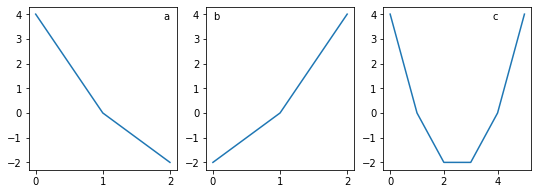

In [2]:
a = [x**2-3*x for x in range(-1,2)]
b = [x**2 - 3 * x for x in range(2,5)]
c = [x**2 - 3 * x for x in range(-1, 5)]

plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(a)
plt.text(1.9,3.8, 'a')
plt.subplot(132)
plt.plot(b)
plt.text(0, 3.8, 'b')
plt.subplot(133)
plt.plot(c)
plt.text(3.8, 3.8, 'c')

这两张图，虽然一个向下，一个向上，但实际上它们都是向上的抛物线，都有同样的正加速度。因为这个正加速度存在，所以图a继续运行下去，就形成了图b。图a、图b和图c其实都是同一条曲线。
这一个发现的重要性在于，图c就是老股民所说的黄金坑。现在，我们通过一个简单的参数（加速度）就可以捕捉这黄金坑了。如果前几个周期已确认能够拟合为一个向上的抛物线，当我们在股价刚刚跃过最低点，再次确认向上抛物线成立时买入，是不是就买在了起涨点上？

那么，我们又该如何发现这种黄金坑呢？这里还要用到多项式拟合。前面我们在求直线的斜率时，就是先将给定的时间序列拟合成一条直线，如果其拟合误差在可接受的范围内，我们就认为该时间序列是一条直线，并返回斜率。同样地，我们在这里，也是将给定的时间序列拟合成一条二次曲线，如果拟合误差在可接受范围内，我们就认为该时间序列是一条二次曲线，并返回系数。

In [40]:
def moving_average(ts, win):
    return np.convolve(ts, np.ones(win)/win, 'valid')


def rmse(y, y_hat):
    """
    返回预测序列相对于真值序列的标准差。
    Args:
        y:
        y_hat:

    Returns:

    """
    return np.sqrt(np.mean(np.square(y - y_hat)))

def find_parabola(unit='1M', error=3e-2, fit_win=7):
    x = np.arange(7)
    fields = ['date', 'close', 'open','volume']
    for code in securities.index:
        bars = jq.get_bars(code, fit_win + 5 - 1, unit=unit, include_now=True, df=False, fields=fields)
        if len(bars) != fit_win + 5 -1:
            continue
            
        ma = moving_average(bars['close'], 5)
        ts = ma/ma[0]
        coef = np.polyfit(x, ts, deg=2)
        p = np.poly1d(coef)
        ts_hat = np.array([p(xi) for xi in x])
        err = rmse(ts, ts_hat) / np.sqrt(np.mean(np.square(ts)))
        if err > error:
            continue
        
        a,b,c = coef
        vert_x = -b / (2 * a)
        t1 = a > 0 and (fit_win-2)>vert_x > 1
        if not t1:
            continue
        vol_up = bars['volume'][-4:-1]>bars['volume'][-5:-2]
        
        t2 = np.count_nonzero(vol_up) >= 2
        if not t2:
            continue
            
        ups = bars['close'][-3:]>bars['open'][-3:]
        t3 = np.count_nonzero(ups) == 3
        if not t3:
            continue

        print(code, securities.loc[code]['display_name'])
        
find_parabola()

000416.XSHE 民生控股
000552.XSHE 靖远煤电
000625.XSHE 长安汽车
000787.XSHE *ST创智
000932.XSHE 华菱钢铁
000981.XSHE *ST银亿
002027.XSHE 分众传媒
002042.XSHE 华孚时尚
002088.XSHE 鲁阳节能
002096.XSHE 南岭民爆
002132.XSHE 恒星科技
002144.XSHE 宏达高科
002149.XSHE 西部材料
002207.XSHE 准油股份
002323.XSHE *ST雅博
002333.XSHE ST罗普
002390.XSHE 信邦制药
002483.XSHE 润邦股份
002571.XSHE 德力股份
002595.XSHE 豪迈科技


<ipython-input-40-2f56235fc983>:35: RuntimeWarning: divide by zero encountered in double_scalars
  vert_x = -b / (2 * a)


002617.XSHE 露笑科技
002630.XSHE 华西能源
002651.XSHE 利君股份
002687.XSHE 乔治白
002729.XSHE 好利来
002819.XSHE 东方中科
002919.XSHE 名臣健康
300035.XSHE 中科电气
300044.XSHE 赛为智能
300056.XSHE 中创环保
300061.XSHE 旗天科技
300067.XSHE 安诺其
300071.XSHE 华谊嘉信
300072.XSHE 三聚环保
300084.XSHE 海默科技
300091.XSHE 金通灵
300099.XSHE 精准信息
300100.XSHE 双林股份
300105.XSHE 龙源技术
300108.XSHE 吉药控股
300116.XSHE 保力新
300127.XSHE 银河磁体
300128.XSHE 锦富技术
300129.XSHE 泰胜风能
300135.XSHE 宝利国际
300139.XSHE 晓程科技
300150.XSHE 世纪瑞尔
300154.XSHE 瑞凌股份
300182.XSHE 捷成股份
300195.XSHE 长荣股份
300205.XSHE 天喻信息
300211.XSHE 亿通科技
300217.XSHE 东方电热
300218.XSHE 安利股份
300228.XSHE 富瑞特装
300232.XSHE 洲明科技
300237.XSHE 美晨生态
300239.XSHE 东宝生物
300240.XSHE 飞力达
300247.XSHE 融捷健康
300252.XSHE 金信诺
300254.XSHE 仟源医药
300258.XSHE 精锻科技
300262.XSHE 巴安水务
300269.XSHE 联建光电
300283.XSHE 温州宏丰
300287.XSHE 飞利信
300288.XSHE 朗玛信息
300295.XSHE 三六五网
300297.XSHE 蓝盾股份
300300.XSHE 海峡创新
300301.XSHE 长方集团
300309.XSHE 吉艾科技
300317.XSHE 珈伟新能
300325.XSHE 德威新材
300335.XSHE 迪森股份
300343.XSHE 联创股份
300344.XSHE 太空智造
300348.XSHE 长亮科技
30035